<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Fernanda Urrea, ROL: 201551522-0 </H3>
<H3 align='center'> Matías Gómez, ROL: 201460501-3 </H3>

<hr style="height:2px;border:none"/>

## 1. Aprendizaje con regresión lineal.


El modelo de regresión lineal  es una combinación lineal entre variables independientes para obtener otra variable, dependiente de éstas. Lo cual puede resultar bastante simple, pero, hoy en día, ha podido ser aplicado a varios problemas con buenos resultados, como predicción en finanzas y en medicina. Sin embargo, también puede ser un medio para aplicar un modelo más grande, por ejemplo utilizarlo para que, con el resuido, detectar *outliers*, rellenar vacíos/datos incompletos o aprender un *score* para ranquear objetos, lo que haremos en esta sección.

<img src="http://chanakya.ca/wp-content/uploads/2018/05/EstimateMultipleLinearRegressionCoefficientsExample_01.png" height="15%" />


El problema de *learning to rank* es aplicado comúnmente en *Information Retrieval* (IR). Sin embargo, el aprender ésta función puede ser crucial para modelar la importancia de distintos objetos.  


En esta actividad trabajaremos con el problema de predecir el *ranking* mundial de una Universidad en base a distintas características de ésta (dataset *World University Rankings*, a través del siguiente __[link](https://www.kaggle.com/mylesoneill/world-university-rankings)__) en la plataforma de *Kaggle*. En este problema el *ranking* es una medición de qué tan buena es la universidad e intentaremos predecirla a través un modelo simple de regresión lineal. En particular, dentro de los miles de diferentes sistemas de rankings, nacionales e internacionales, entre los cuales comúnmente existen desacuerdos entre ellos, trabajaremos con el ranking ampliamente considerado como uno de las más influyentes y ampliamente observadas: *Times Higher Education World University* .

#### a) Cargue los datos a analizar, descargándolos desde la plataforma como se indicó, en formato *dataframe pandas*. Descríbalos adecuadamente, ya sea la variable dependiente o las independientes, si es que lo son.

In [1]:
import pandas as pd
df = pd.read_csv("timesData.csv")
df.head()


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [2]:
df.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


blabla

In [3]:
df.shape

(2603, 14)

El dataset contiene 2603 entradas correspondientes a distintas universidades, con 14 características para cada una:  

world_rank: Ranking que se le asigna a la universidad.  
university_name: Nombre de la universidad.  
country: País de la universidad.  
teaching: Puntaje por enseñanza.  
international: Puntaje de perspectiva internacional.  
research: Puntaje por investigación.  
citations: Puntaje por citas a la institución.   
income: Puntaje por ingresos de la industria.  
total_score: Puntaje representativo de las caracteristicas anteriores para la institución.   
num_students: Número de estudiantes de la institución.  
student_staff_ratio: Razón entre el número de estudiantes y la cantidad de personal.  
international_students: Porcentaje de estudiantes internacionales.  
female_male_ratio: Razón entre estudiantes mujeres y hombres.  
year: Año del ranking (2011 a 2016).    

#### b) Debido a la estructura será necesario realizar un leve pre-proceso. Existen vacíos entre los datos o valores '-', por lo que será necesario eliminarlos (*o si piensa una mejor manera de manejar ésto puede hacerlo, se verá reflejado en su nota*). Además de ésto deje los datos con *score unkown* o '-' en un conjunto *target* separado, *unlabeled data* (éste será el objetivo del entrenamiento) ¿Cuántos datos quedan en cada conjunto? 

In [4]:
import numpy as np;

def convertToInt(x):
    try:
        x = int(x)
    except:
        x = 0
    return x

df.dropna(axis=0,inplace=True,how='any') #borra nan
df["total_score"] = df["total_score"].apply(lambda x: x.replace('-','unknown')) #rellena 
df = df[~(df == '-').any(axis=1)] #elimina filas con valores nulos

#Se crean variables categóricas
nuevo_df  = pd.get_dummies(df, columns=["country"]) #column to categorical
nuevo_df['female'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[0].apply(convertToInt)
nuevo_df['male'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[1].apply(convertToInt)
nuevo_df['female_male_ratio'] =  np.where(nuevo_df['male'] == 0, 0, nuevo_df['female']/nuevo_df['male']) #si no hay (rellena 0) 
nuevo_df['num_students'] = nuevo_df['num_students'].apply(lambda x: int(str(x).replace(',','')))
nuevo_df['international_students'] = nuevo_df['international_students'].apply(lambda x: int(str(x).replace('%','')))
print('Antes de separar: ', nuevo_df.shape)

#Se separa el dataset según si tienen score conocido o no
df_test = nuevo_df[nuevo_df["total_score"]=='unknown']  #para predecir al final
nuevo_df =  nuevo_df[nuevo_df["total_score"]!='unknown'] #elimina unknown rank..
print('Después de separar, el conjunto con score asignado: ', nuevo_df.shape)
print('Después de separar, el conjunto con score desconocido : ', df_test.shape)

Antes de separar:  (2174, 82)
Después de separar, el conjunto con score asignado:  (954, 82)
Después de separar, el conjunto con score desconocido :  (1220, 82)


In [5]:
nuevo_df.head()

,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,...,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,female,male
1,2,California Institute of Technology,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,...,0,0,0,0,0,0,0,1,33,67
2,3,Massachusetts Institute of Technology,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,...,0,0,0,0,0,0,0,1,37,63
3,4,Stanford University,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,...,0,0,0,0,0,0,0,1,42,58
5,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,91.2,18812,11.8,...,0,0,0,0,0,0,1,0,46,54
6,6,University of Oxford,88.2,77.2,93.9,95.1,73.5,91.2,19919,11.6,...,0,0,0,0,0,0,1,0,46,54


In [6]:
df_test.head()

,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,...,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,female,male
400,201-225,Autonomous University of Barcelona,33.7,45.9,27.9,57.9,37.0,unknown,30538,12.3,...,0,0,0,0,0,0,0,0,59,41
402,201-225,Cardiff University,28.9,67.8,34.0,51.7,35.5,unknown,23347,13.1,...,0,0,0,0,0,0,1,0,57,43
403,201-225,Colorado School of Mines,24.6,38.4,22.8,63.7,99.4,unknown,5287,18.2,...,0,0,0,0,0,0,0,1,26,74
404,201-225,Nagoya University,45.5,21.2,39.2,43.8,33.1,unknown,15529,7.9,...,0,0,0,0,0,0,0,0,29,71
405,201-225,National Tsing Hua University,42.7,17.7,44.5,39.7,46.8,unknown,10221,13.5,...,1,0,0,0,0,0,0,0,33,67


De la base de datos inicial, se crean más variables categoricas en base a las cualitativas. (Aparecen muchas nuevas variables de valor 1 si se cumple una condición y valor 0 si no).    
El dataset se separa en dos conjuntos uno con el score asignado, llamado $\textbf{nuevo_df}$ y otro con score desconocido, llamado $\textbf{df_test}$.  

#### c) Cree las matrices de cada conjunto con las que trabajará. Además de ésto separe el conjunto de pruebas fijo que se utilizará, recuerde que éste no puede ser utilizado. Si estima conveniente también cree conjunto de validación.

In [7]:
import numpy as np;

Y = nuevo_df['total_score'].values
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).values
X_test = df_test.drop(["total_score","world_rank","university_name"],axis=1).values
Y = Y.astype('float32')
X = X.astype('float32')
X_test = X_test.astype('float32')
X.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


#Conjuntos de validación
X_val = X_train[500:667]
y_val = y_train[500:667]


#Conjuntos de entrenamiento finales
X_train=X_train[:500]
y_train=y_train[:500]

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(500, 79) (167, 79) (287, 79) (500,) (167,) (287,)


Se crearon las matrices de 3 conjuntos: 
  
Conjunto de entrenamiento: Consta de 500 ejemplos. (X_train, y_train)  
Conjunto de validación: Consta de 167 ejemplos. (X_val, y_val)  
Conjunto de prueba: Consta de 287 ejemplos. (X_test, y_test)

Para que la elección de los ejemplos de cada conjunto se utilizó la función train_test_split de la librería sklearn, con la cual la elección fue aleatoria.

#### d) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar ésto.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Para la normalización de los datos se utiliza la función StadardScaler de la libreria sklearn, que transforma los datos a una distribución normal de media 0 y varianza 1.  
Se aplicó esta normalización para los inputs de los conjuntos de entrenamiento, validación y prueba.  
Normalizar los datos es importante porque se trabaja a una misma escala, y porque se trabaja con una distribución N(0,1) que es conocida.

#### e) Realice una regresión lineal de mı́nimos cuadrados básica. Mida el residuo de cada predicción en cada dato y haga un gráfico de éste ¿Qué indica lo observado?

C:\Users\Matu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


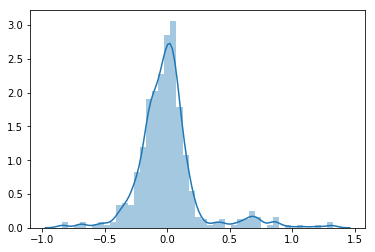

In [10]:
from sklearn.linear_model import LinearRegression as LR
linreg = LR(fit_intercept=True, n_jobs=1)
linreg.fit(X_train_scaled,y_train)


import seaborn as sns
res = y_train-linreg.predict(X_train_scaled)
sns.distplot(res)


#sns.distplot(linreg.predict(X_train_scaled))

Se observa que, el residuo se distribuye de forma simétrica con respecto al cero.   
Además, notamos que graficamente el error se distribuye $ \mathcal{N} ( 0 , \sigma^2 )$

#### f) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? Compare y comente ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo que observa y cuál puede ser la causa?

In [87]:
for i in range(len(res)):
    print("El Z-score ", i, " es ", res[i])
    


El Z-score  0  es  -0.019817352
El Z-score  1  es  0.028057098
El Z-score  2  es  0.01563263
El Z-score  3  es  0.8385544
El Z-score  4  es  -0.19965363
El Z-score  5  es  -0.28314972
El Z-score  6  es  0.169487
El Z-score  7  es  0.17632294
El Z-score  8  es  -0.0623703
El Z-score  9  es  0.037311554
El Z-score  10  es  -0.32970428
El Z-score  11  es  0.031158447
El Z-score  12  es  -0.0476532
El Z-score  13  es  0.073272705
El Z-score  14  es  0.8513489
El Z-score  15  es  -0.17802429
El Z-score  16  es  0.06977844
El Z-score  17  es  0.0017166138
El Z-score  18  es  0.09092331
El Z-score  19  es  0.02532196
El Z-score  20  es  0.16548538
El Z-score  21  es  -0.14550018
El Z-score  22  es  -0.11420441
El Z-score  23  es  0.03579712
El Z-score  24  es  0.016654968
El Z-score  25  es  0.08501434
El Z-score  26  es  -0.48514938
El Z-score  27  es  0.11338425
El Z-score  28  es  -0.19750214
El Z-score  29  es  -0.22475052
El Z-score  30  es  -0.1709671
El Z-score  31  es  -0.46925735
El 

El Z-score  317  es  -0.04032898
El Z-score  318  es  0.1391182
El Z-score  319  es  -0.14823532
El Z-score  320  es  1.3256912
El Z-score  321  es  0.058647156
El Z-score  322  es  0.05171585
El Z-score  323  es  -0.23104858
El Z-score  324  es  -0.2313919
El Z-score  325  es  -0.20480347
El Z-score  326  es  0.013385773
El Z-score  327  es  0.028766632
El Z-score  328  es  -0.07450485
El Z-score  329  es  0.02720642
El Z-score  330  es  0.18550491
El Z-score  331  es  -0.13993835
El Z-score  332  es  0.20093536
El Z-score  333  es  0.031208038
El Z-score  334  es  0.17129517
El Z-score  335  es  0.17632294
El Z-score  336  es  -0.1544609
El Z-score  337  es  0.15410614
El Z-score  338  es  -0.06449509
El Z-score  339  es  -0.049995422
El Z-score  340  es  0.07268524
El Z-score  341  es  -0.09762573
El Z-score  342  es  0.12895966
El Z-score  343  es  -0.031784058
El Z-score  344  es  0.07356644
El Z-score  345  es  0.0067214966
El Z-score  346  es  0.0835762
El Z-score  347  es  -0.2

El Z-score es una medida numérica de cercanía o lejanía de un dato con respecto a la media de un conjunto de datos al cual pertenece.   
  
Si el Z-score es 0, el dato es identicamente igual a la media.  
Si el Z-score es postivo, indica que el dato está sobre la media.  
Si el Z-score es negativo, el dato está bajo la media.  


#### g) Calcule la información mútua de los distintos predictores (variables) con respecto a la variable *output* o *target*. Comente con lo calculado anteriormente y se le parece razonable.

In [31]:
from sklearn.feature_selection import mutual_info_regression
minfo_predictor= mutual_info_regression(X_train_scaled,y_train)
print(minfo_predictor, '\n')

contador=0
for i in range(len(minfo_predictor)):
    if minfo_predictor[i] < 0.3 and minfo_predictor[i] > 0.1:
        contador=contador+1
print('Hay ', contador, ' datos con información mutua menor a 0.3 y mayor a 0.1, de un total de ', len(minfo_predictor))



[0.9329069  0.05735683 1.00655621 0.29589166 0.1321706  0.20712079
 0.2617786  0.24482767 0.25238593 0.23541317 0.20465116 0.19190791
 0.1837217  0.16907405 0.20709927 0.19871621 0.19427887 0.22747306
 0.1816219  0.19492481 0.18177813 0.19598523 0.18899337 0.19609566
 0.19608178 0.20698657 0.18736721 0.17362542 0.18766146 0.21479351
 0.20084742 0.18797928 0.22346736 0.16626291 0.18496676 0.18151484
 0.18655393 0.19931276 0.20270935 0.19905915 0.18778898 0.21881738
 0.18705659 0.18902256 0.1960639  0.19562506 0.19538364 0.2116191
 0.21289943 0.18764969 0.19086734 0.20679721 0.18307727 0.1847618
 0.18450215 0.19529858 0.17573013 0.18876583 0.18018568 0.20149315
 0.19946489 0.18072371 0.19608024 0.17204304 0.1930393  0.18638582
 0.19500517 0.22827772 0.22634448 0.17345385 0.18475996 0.17924292
 0.18322025 0.20745419 0.20786189 0.21030089 0.28803822 0.24168748
 0.23860953] 

Hay  76  datos con información mutua menor a 0.3 y mayor a 0.1, de un total de  79


Si bien la relación entre los datos no es tan alta, la mayoria de los datos se concentran entre 0.1 y 0.3, por lo que la relación tiende a ser parecida para la muestra, por ende, razonable.

#### h)  Construya una función que implemente *Forward Step-wise Selection* (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo. Ordene el eje $x$ de menor a mayor.

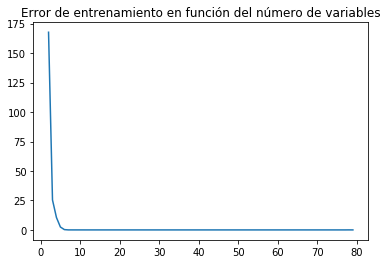

In [11]:
import matplotlib.pylab as plt

def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    
    error_train = []
    numero_de_variables = []
    
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        #remaining.remove(best_candidate)
        selected.append(best_candidate)
        
        error_train.append(mse_candidate)
        numero_de_variables.append(len(indexes))
        
        #print ("selected = %s ..."%names_x[best_candidate])
        #print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected,error_train,numero_de_variables
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns


selected, error_train, numero_de_variables=fss(X_train_scaled,y_train,names_regressors)
plt.plot(numero_de_variables,error_train)
plt.title('Error de entrenamiento en función del número de variables')
plt.show()

#### i) Ajuste un modelo lineal utilizando “*Ridge Regression*”, es decir, regularizando con la norma $l_2$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^0, 10^6$], variando si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Deje un gráfico sólo para analizar los coeficientes de los países. Describa lo que observa.

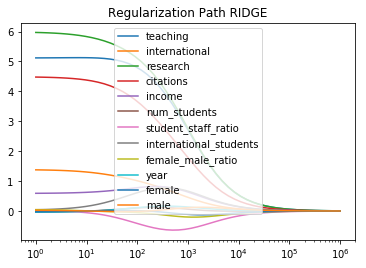

Text(0.5,1,'Regularization Path RIDGE of country coefs')

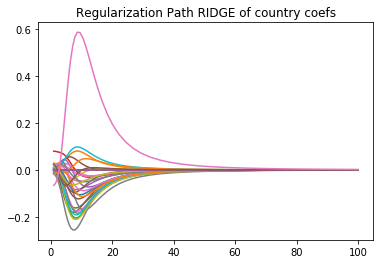

In [12]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt

names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
    
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
        
ax.set_xscale('log')

plt.title('Regularization Path RIDGE')
plt.legend()
plt.show()

...#modify


alphas_nuevo = np.logspace(0,2,base=10)
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" in label:
        plt.plot(alphas_nuevo, y_arr, label=label)

plt.title('Regularization Path RIDGE of country coefs')


#### j) Ajuste un modelo lineal utilizando el método “*Lasso*”, es decir, regularizando con la norma $l_1$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^{-2},10^3$]. Para obtener el código, modifique el ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?

In [13]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(-2,3,base=10)
model = Lasso(fit_intercept=True)
...
country_alphas_ = np.logspace(-5,0,base=10)

#### k) Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un gráfico que muestre el error de entrenamiento y el de pruebas como función del parámetro de regularización. Discuta lo que  observa.

In [21]:
alphas_ = #choose it
coefs = []
model = #choose it
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    yhat_train = model.predict(X_train_scaled)
    yhat_test = model.predict(X_test_scaled)
    mse_train.append(np.mean(np.power(yhat_train - y_train, 2)))
    mse_test.append(np.mean(np.power(yhat_test - y_test, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge/lasso')
ax.plot(alphas_,mse_test,label='test error ridge/lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

SyntaxError: invalid syntax (<ipython-input-21-f4acfbe2dc93>, line 1)

#### l) Estime el valor del parámetro de regularización en **alguno** de los modelos anteriores haciendo uso de la técnica validación cruzada con un número de folds igual a $K= 5$ y $K = 10$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Mida el error real del modelo (ésto es sobre el conjunto de pruebas). Debido a la escala del error puede utilizar auxiliarmente *MAE* como métrica de desempeño. Compare y concluya.

In [12]:
yhat_test = linreg.predict(X_test_scaled)
mse_test = np.mean(np.power(yhat_test - y_test, 2))
from sklearn.model_selection import KFold
K=10
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(X_train_scaled):
    linreg = LR(fit_intercept=True, n_jobs=1)
    linreg.fit(X_train_scaled[train], y_train[train])
    yhat_kfold_val = linreg.predict(X_train_scaled[val])
    mse_fold = np.mean(np.power(yhat_kfold_val - y_train[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / K
...#or MAE
mae_fold = np.mean(np.abs(yhat_kfold_val - y_train[val]))

NameError: name 'X_test_scaled' is not defined

#### m) Con el modelo que se piense que es el mejor, en base a todo lo experimentado. Realice el *ranking* de las universidades del que no se tienen etiquetas (*unlabeled data* o *target data*) a través de predecir los datos que se dejaron como *pruebas* y ordenar su score en el *dataframe*.

In [13]:
df_test["total_score"] = model.predict(X_test_scaled) #predict score
...#armar un raking
univ_chilenas = df_test[df_test["country_Chile"]==1]
rannking_univ_ch = univ_chilenas.sort_values(by="total_score",ascending=False)
ranking = 1
for index,row in rannking_univ_ch.iterrows():
    print("%d - Institucion: %s" %(ranking,row["university_name"]))
    ranking+=1

NameError: name 'model' is not defined

## Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] Ethem Alpaydin. *Machine Learning*. 2014.  
[3] Bentley, P. and Nordehn, G. and Coimbra, M. and Mannor (2011) , Classifying Heart Sounds Challenge,
CHSC2011, http://www.peterjbentley.com/heartchallenge/index.html  
[4] https://www.kaggle.com/toregil/new-labels-for-set-a  
[5] https://en.wikipedia.org/wiki/Fourier transform  
[6] https://www.kaggle.com/primaryobjects/voicegender/data  
[7] Gamit, M. R., Dhameliya, P. K., & Bhatt, N. S. (2015). Classification Techniques for Speech Recognition:
A Review. vol, 5, 58-63.  
[8] www.figure-eight.com/  
[9] https://machinelearningmastery.com/develop-word-embeddings-python-gensim/, https://radimrehurek.com/gensim/models/word2vec.html or https://nathanrooy.github.io/posts/2018-03-22/word2vec-from-scratch-with-python-and-numpy/  
[10] https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-6-doc2vec-603f11832504